In [44]:
%load_ext autoreload
%autoreload
%run ./prepare_data.ipynb
%run ./analysis.ipynb
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


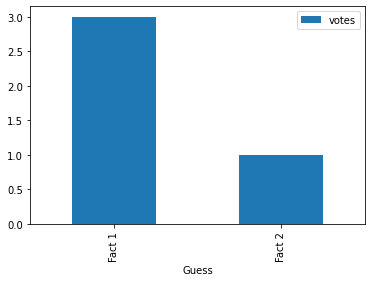

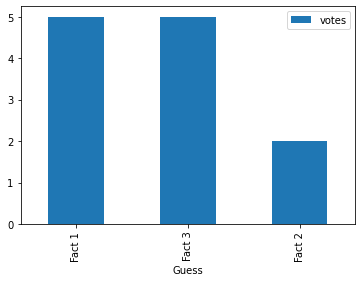

In [45]:
# plot histogram
fact_choice.plot.bar(x='Guess');
total_votes.plot.bar(x='Guess');

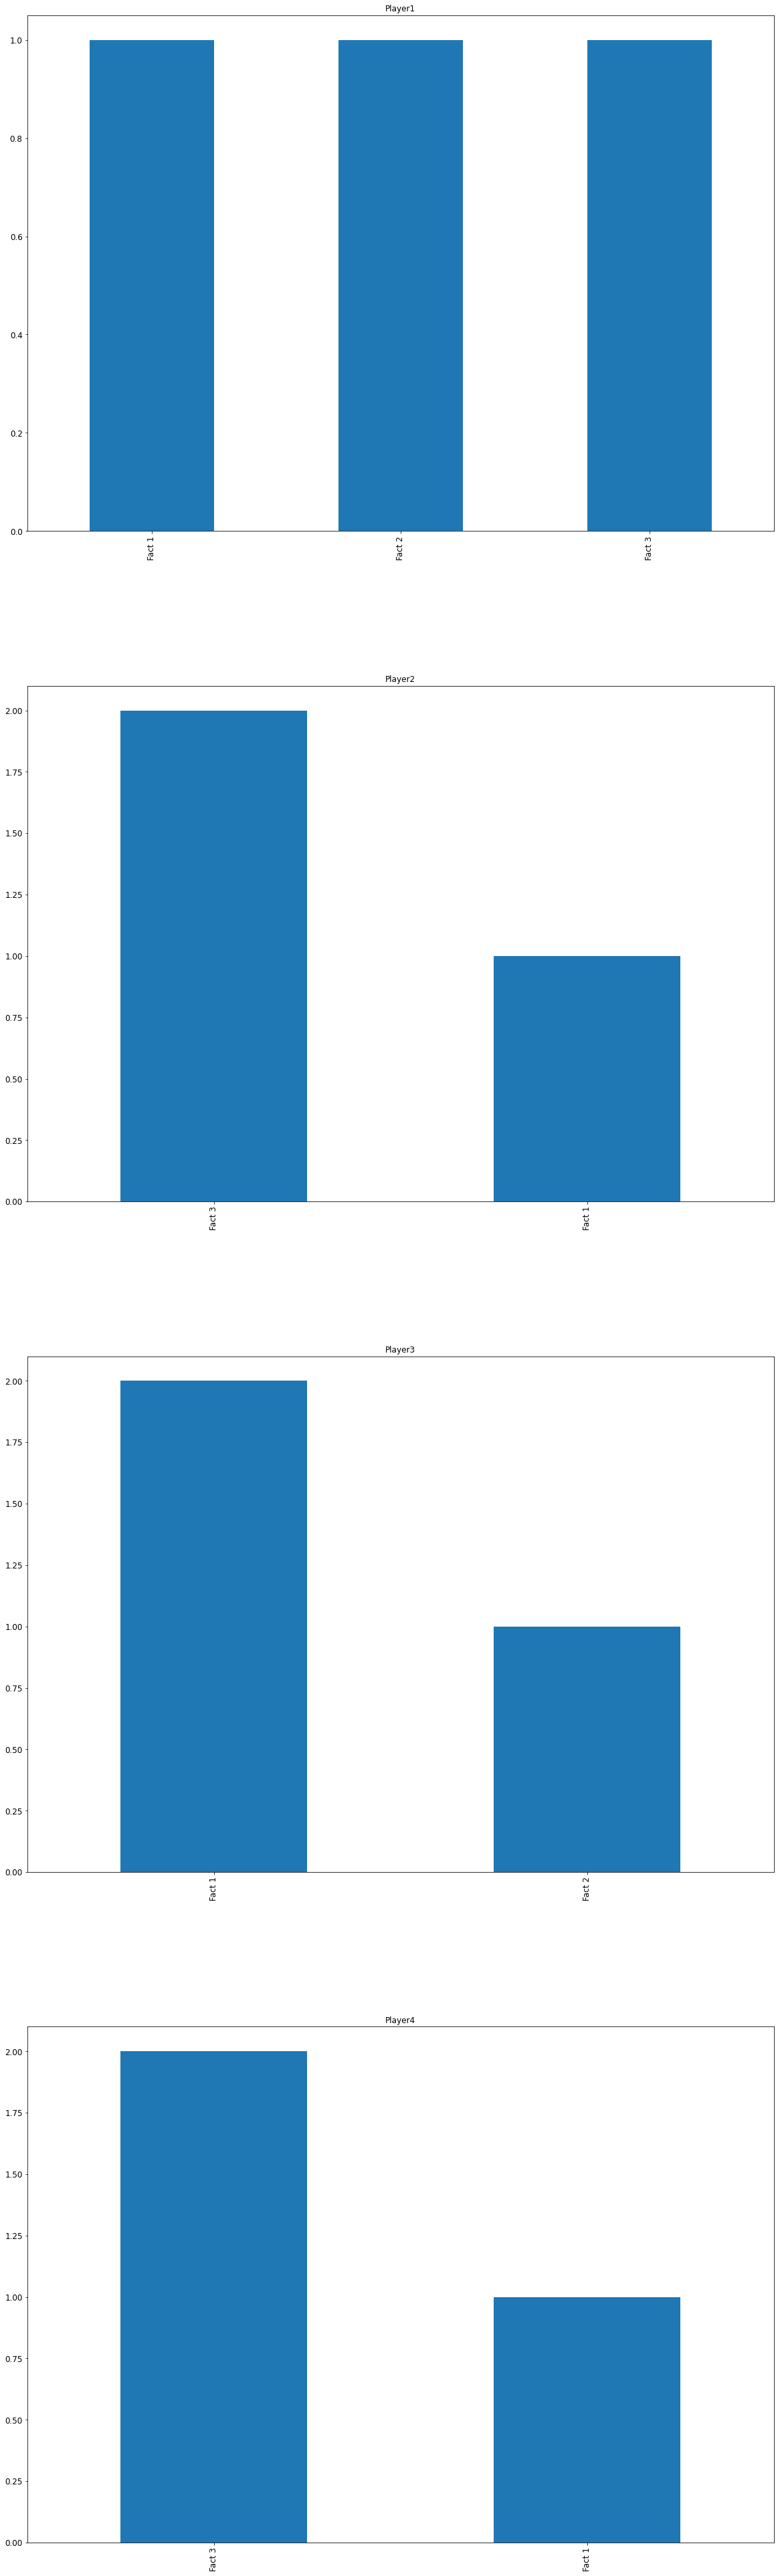

In [46]:
# bar chart per URL, the correct answer is colored in green, the rest of the guesses are blue

fig, axes = plt.subplots(len(owners),1,figsize=(20, 60))
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1)
for i,ax in enumerate(axes):
    o = owners[i]
    temp_df = df_guess.loc[df_guess['Owner'] == o]
    labels = temp_df['Owner']
    cor_ans = df2_raw[df2_raw['Player'] == o]['Guess'].values[0]
    ind=labels.isin([cor_ans])
    #color=list(map(lambda x: 'C2' if x else 'C0', ind)) #FIXME
    color=list(map(lambda x: 'C0' if x else 'C0', ind))
    width = len(ind) * [0.2]
    temp_df.loc[:,['Guess','votes']].plot.bar(ax=ax,subplots=True, x='Guess',y='votes',color=color, fontsize=12);
    ax.get_legend().remove()
    ax.set_title(o,fontdict={'fontsize':12})
    ax.set(xlabel=None)

plt.savefig('../../data/charts/bar-chart3.pdf', bbox_inches='tight')
#plt.show()

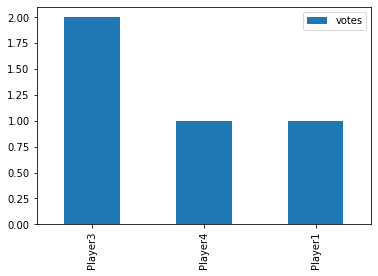

In [47]:
corr_player_stats.sort_values('votes')
fig = corr_player_stats.plot.bar(y='votes').get_figure()
fig.savefig('../../data/charts/correct_guess_stats.png', bbox_inches='tight')

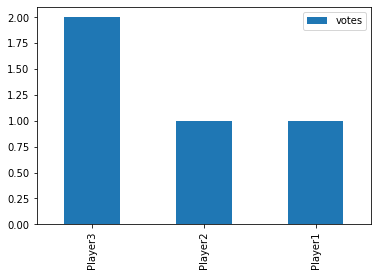

In [48]:
corr_guess_stats.sort_values('votes')
fig = corr_guess_stats.plot.bar(y='votes').get_figure()
fig.savefig('../../data/charts/correct_player_stats.png', bbox_inches='tight')

In [49]:
total_votes.head()


,Guess,votes
0,Fact 1,5
1,Fact 3,5
2,Fact 2,2


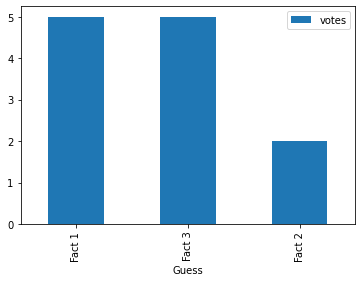

In [50]:
# total votes for facts
#total_votes.sort_values
fig = total_votes.plot.bar(y='votes',x='Guess').get_figure()
fig.savefig('../../data/charts/guessed_player_stats.png', bbox_inches='tight')

In [51]:
# wrongs votes for player
#fig = wrong_votes.plot.bar(y='votes',x='Guess').get_figure()
#fig.savefig('../data/charts/wrong_guesses_stats.png', bbox_inches='tight')

